# Decision Tree

- Can be used for classification and regression
- Decision trees can handle both categorical and numerical data.

 Is a tree structured classifier with 2 types of nodes
 
 **Decision node** - it is kind of test or condition which helps us to `decide the direction we need to move`(simply tells us the category) will 
    traverse till we reach a leaf node
    
**Leaf Node** - can be predicted value or a categorical value or a probability

we can take an example of loan application approval

### Types of algorithms in decision trees
 
 https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134 - reference

1) Trees with `low depth` or smaller number of nodes   --   leading to preferring small trees

   ## Top down induction in Decision tree algorithm (ID3)

- choose a best attribute assign it to decision node
- for each value of attribute create a new descendent(type of class)
- If all the training examples are properly classified(values same as target value)stop,else iterate over leaf nodes 

repeat step 1

##### To decide best attribute to split on  1st  so the tree size will be less and effective

To identify this we have many methods
we are choosing a method based on **entropy and gain**

**`Entropy`** : It is simply a measure of disorder in a system (if at a particular  node if all examples are `+ve` or `-ve` i.e belongs to same class it homogeneous set)
- for a homogeneous set the `entropy is min (~ 0)`  - **Generally at leaf node Entropy = 0**
- In the examples if half set belong to one class and another half belong to 2nd class then `entropy is high`

It is also a measure of purity

**`Information Gain`** : measures how well a given attribute seperates the training example according to the target classification

-  Choose attribute with the **largest information gain as the decision node**, divide the dataset by its branches and repeat the same process on every branch.
- `Expected reduction in Entropy `due to partioning of a sample(S) on Attribute A

## Gini Index

- measure of node impurity

# Overfitting

When the test error is very high and training error is less 

1)  we make the decision tree more and more complex it may try to fit noise results in overfitting

2) If we have too few training examples and we are trying to accomodate errors with training ex - Under fitting

###### to avoid over fitting

`Prepruning`: Stop growing when the decision split is not satisfactorily significant
 - stop early

`Postpruning`: Grow full tree then remove nodes
  - Cross validation techniques

### Triple Trade off

There is a trade-off between 3 factors:
 
 `complexity of Hypothesis (model)`
   
 `Training set size`

`Generalization error on new data`

##### Regularization  - for linear regression44
https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a - reference

As the model is **`becoming complex(like polynomial regression) the value of the weights will keep on increasing `** to 5 or 6 digit number some times
`Which is leading to overfitting`

To Optimise the model to generalise the model(not leading to overfitting)

We will **penalise the weights** by adding some error to the `loss function`
which is called **Regularization**

#### L2 Regularization or RIDGE regression

Ridge regression adds **“squared magnitude”** of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

- Here, if lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.

#### L1 Regularization or Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds **“absolute value of magnitude”** of coefficient as penalty term to the loss function.

- Again, if lambda is zero then we will get back OLS whereas very large value will make coefficients zero hence it will under-fit.

The fitting procedure involves a loss function, known as `residual sum of squares or RSS`. The coefficients are chosen, such that they minimize this loss function.

#### When to use?

The key difference between these techniques is that **Lasso** shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for **feature selection in case we have a huge number of features.**

Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but these techniques are a great alternative when we are dealing with a large set of features.

# Code implementation - Type 1

Now we will solve the same problems using a decision tree. A decision tree is a **_non-parametric_** machine learning model in contrast to linear/logistic regression which is a _parametric_ model.

In [5]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare Data

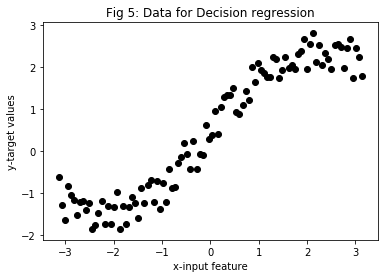

In [3]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for Decision regression')
plt.show()

### Splitting data into train,validation and test data sets

In [5]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

Fit a line to the data
----------------------
A decision tree learns a piece-wise linear fit to the data. We will use [sklearn.tree.DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

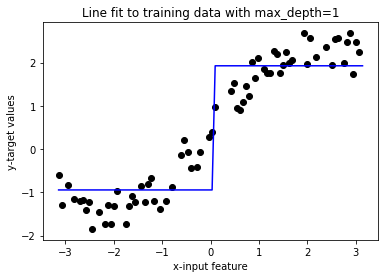

Training MSE:  0.29432319680048724 
Validation MSE:  0.42380102433434474 
Test MSE:  0.5068539649339777


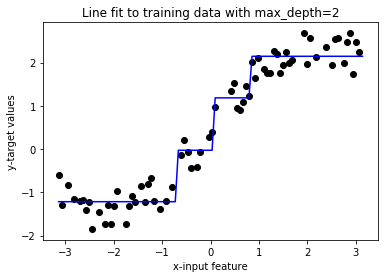

Training MSE:  0.08834894031414132 
Validation MSE:  0.19048402701582898 
Test MSE:  0.11197718292559293


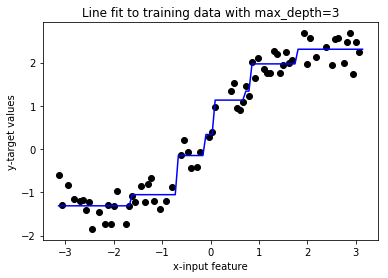

Training MSE:  0.06533957035069642 
Validation MSE:  0.1254772680957092 
Test MSE:  0.08371202668581476


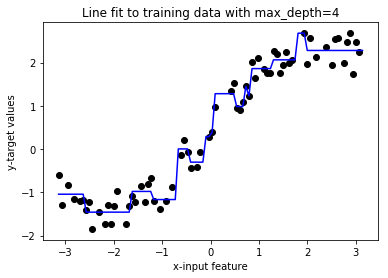

Training MSE:  0.04626625327149797 
Validation MSE:  0.1544778837243083 
Test MSE:  0.14681908554984965


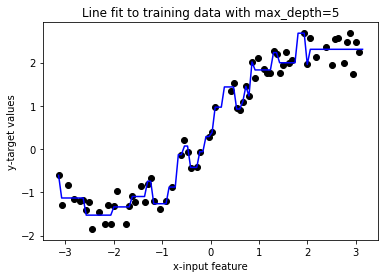

Training MSE:  0.030562639887877722 
Validation MSE:  0.13063608927468165 
Test MSE:  0.11279134135784714


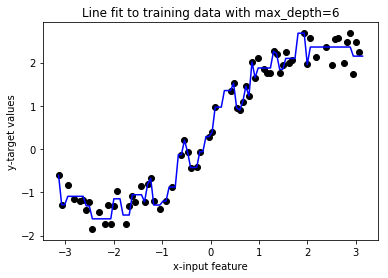

Training MSE:  0.021974498602961308 
Validation MSE:  0.14249504198997817 
Test MSE:  0.10302931669959622


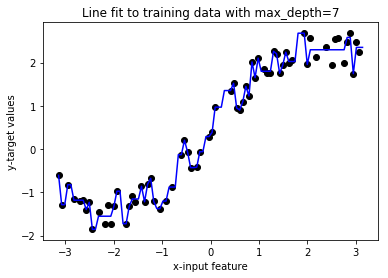

Training MSE:  0.009317735672372391 
Validation MSE:  0.1831520881173377 
Test MSE:  0.10137423826008217


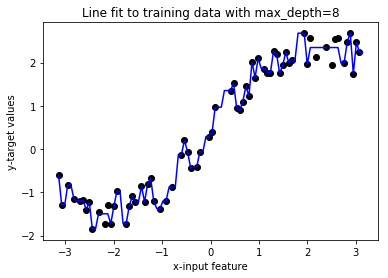

Training MSE:  0.006204467419245745 
Validation MSE:  0.18191374549390207 
Test MSE:  0.09975950611065912


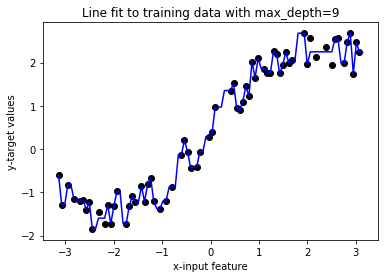

Training MSE:  0.0036315579157246806 
Validation MSE:  0.1882049043737149 
Test MSE:  0.10312742933650122


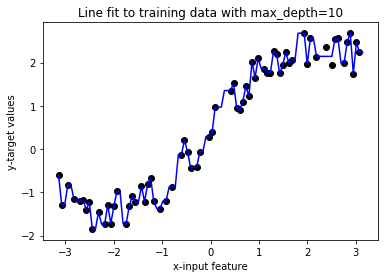

Training MSE:  0.0011598173089959237 
Validation MSE:  0.17329089231601727 
Test MSE:  0.1120363013049657


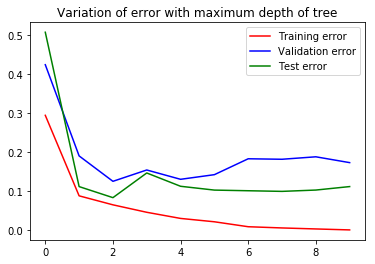

In [7]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print( 'Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

Notice how the generalization performance of the model can be controlled via the depth of a decision tree. The training error decreases steadily with increasing depth as the model fits the data more and more closely. The generalization errors given by the validation and test errors also decrease till a depth of 3 as the bias in the model reduces. However, as we increase the depth beyond 3, the model starts overfitting the data (huggs onto noise in the data) and validation and test errors increase. Thus the ability of the model to generalize deteriorates as overfitting sets in.

# Decision Tree Classifiation

A decision tree can be used to learn a piece-wise linear decision boundary between classes. We demonstrate the working of a decision tree on the entire of Iris dataset. We use [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

The example was taken from: http://scikit-learn.org/stable/modules/tree.html#classification.

The decision boundaries learnt by the different decision nodes can be visualized as described here: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#plot-the-decision-surface-of-a-decision-tree-on-the-iris-dataset.

### Prepare dataset

In [6]:
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

In [7]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
y_train

array([1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0,
       2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2])

In [2]:
from sklearn.externals.six import StringIO
#!conda install -c conda-forge pydotplus --yes
import pydotplus
from IPython.display import Image
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


In [10]:
dot_data = StringIO()
filename = "model.png"

out=tree.export_graphviz(model ,out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: must be str, not numpy.int64

The [_gini coefficient_](https://en.wikipedia.org/wiki/Gini_coefficient) is a measure of homogenity in a cluster. Gini coefficient of 0.0 indicates that a cluster is completely homogeneous (i.e. only one class is present in the cluster).

In [15]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 4.545454545454546 %
test misclassification percentage = 4.545454545454546 %
